# 探索数据集：研究项目 《泰坦尼克号》

## 数据源

> https://www.kaggle.com/c/titanic/data train.csv

## 数据字典

变量|定义|值
:---|:---|:---
PassengerId|乘客编号|
Survived|是否存活|1（存活），0（死亡）
Pclass|舱位等级|1（Upper），2 （Middle），3 （Lower） 可代表乘客的社会经济状况
Name|乘客姓名|
Sex|乘客性别|
Age|乘客年龄|
SibSp|兄弟姐妹及配偶数|
Parch|父母或子女的个数|
Ticket|船票编号|
Fare|船票价格|
Cabin|客舱编号|
Embarked|登船港口|C,Q,S


## 提出问题

从上面数据字典可以看出，数据中一共有12个变量，我们要探索什么因素影响乘客的存活率，因此我们选择有意义的几个变量，Pclass（舱位等级），Sex（乘客性别），Age（乘客年龄）。因此提出下面几个问题：
- 探索舱位等级对存活率的影响
- 探索乘客性别对存活率的影响
- 探索年龄对存活率的影响
- 探索舱位等级与性别综合因素对存活率的影响

## 数据采集与数据清理

- 导入需要的包

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

- 导入数据

In [5]:
#导入train.csv
train_df = pd.read_csv('train.csv')
#显示前10条数据
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- 数据清理

In [6]:
#统计缺失值
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

龄是分析中的一个重要维度，但是数据集中该信息却有很多缺失值，因此我将缺失的年龄默认赋值为整个数据集年龄的平均值

In [7]:
#用平均年龄代替空值
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 数据探索

In [8]:
def print_result(grouped_survived_factors,grouped_each_group_count,survived_rate):
    '''
    输出数据，存活数，总人数和存活率
    grouped_survived_factors:存活数
    grouped_each_group_count:总人数
    survived_rate:存活率
    '''
    result = pd.concat([grouped_each_group_count,grouped_survived_factors,survived_rate],axis = 1)
    result.columns=['total','survived','rate']
    print result
    

In [9]:
def single_factor_explore(factor,title,xlabel,ylabel):
    '''
    单个特征因素的数据探索
    factor:特征
    title:图表标题
    xlabel:图表X轴标签
    ylabel:图表Y轴标签
    '''
    #按照单个因素分组
    df_grouped = train_df[['Survived',factor]].groupby(factor)
    #每组存活人数
    grouped_survived_factors = df_grouped.sum()
    #每组总人数
    grouped_each_group_count = df_grouped.count()
    #存活率
    survived_rate = grouped_survived_factors/grouped_each_group_count
    #打印结果
    print_result(grouped_survived_factors,grouped_each_group_count,survived_rate)
    #条形图
    survived_rate.plot(kind = 'bar')
    #图表
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [15]:
def interval_factor_explore(factor,factor_group,bins,blabels,title,xlabel,ylabel):
    '''
    区间因素的数据探索
    factor:特征
    factor_group:特征分组名称
    bins:分组区间
    blabels:区间标签
    title:图表标题
    xlabel:图表X轴标签
    ylabel:图表Y轴标签
    '''
    #按照区间因素分组
    train_df[factor_group] = pd.cut(train_df[factor],bins,labels = blabels)
    factor_df = pd.concat([train_df['Survived'],train_df[factor_group]],axis = 1)
    df_grouped = factor_df.groupby(factor_group)
    
    grouped_survived_factors = df_grouped.sum()
    grouped_each_group_count = df_grouped.count()

    survived_rate = grouped_survived_factors/grouped_each_group_count
    print_result(grouped_survived_factors,grouped_each_group_count,survived_rate)
    #条形图
    survived_rate.plot(kind = 'bar')
    #图表
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #饼状图
    survived_rate.plot(kind = 'line',subplots = True)
    plt.ylabel('')
    plt.show()

In [11]:
def double_factor_explore(factor1,factor2,title,xlabel,ylabel):
    '''
    双特征因素的数据探索
    factor1:特征1
    factor2:特征2
    title:图表标题
    xlabel:图表X轴标签
    ylabel:图表Y轴标签
    '''
    #按照双因素分组
    df_grouped = train_df.groupby([factor1,factor2])['Survived']
    #每组存活人数
    grouped_survived_factors = df_grouped.sum()
    #每组总人数
    grouped_each_group_count = df_grouped.count()
    #存活率
    survived_rate = grouped_survived_factors/grouped_each_group_count
    #打印结果
    print_result(grouped_survived_factors,grouped_each_group_count,survived_rate)
    #条形图
    survived_rate.unstack().plot(kind = 'bar')
    #图表
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### 1. 探索舱位等级对存活率的影响

        total  survived      rate
Pclass                           
1         216       136  0.629630
2         184        87  0.472826
3         491       119  0.242363


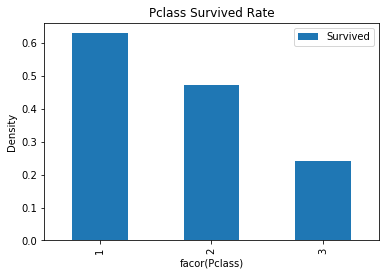

In [12]:
single_factor_explore('Pclass','Pclass Survived Rate','facor(Pclass)','Density')

- X轴代表舱位等级，Y轴代表存活率
- 1级舱位存活率62.96%，2级舱位存活率47.28%，3级舱位存活率24.24%

### 2. 探索乘客性别对存活率的影响

        total  survived      rate
Sex                              
female    314       233  0.742038
male      577       109  0.188908


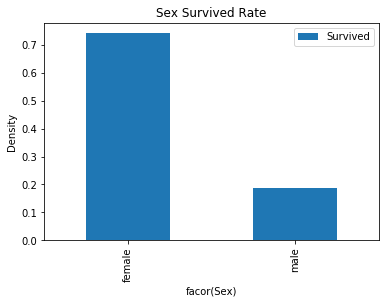

In [13]:
single_factor_explore('Sex','Sex Survived Rate','facor(Sex)','Density')

- X轴代表性别，Y轴代表存活率
- 女性存活率74.20%，男性存活率18.89%

### 3. 探索年龄对存活率的影响

          total  survived      rate
AgeLevel                           
child        77        45  0.584416
young       597       214  0.358459
midlife     195        78  0.400000
aged         22         5  0.227273


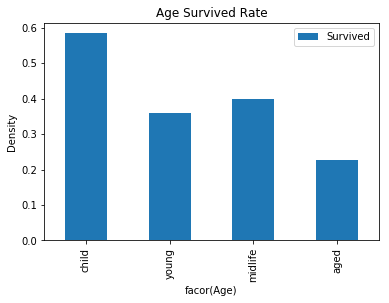

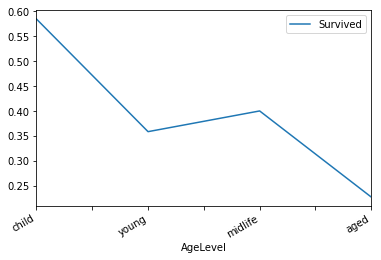

In [16]:
bins = [0,14,35,60,90]
blabels=['child','young','midlife','aged']

interval_factor_explore('Age','AgeLevel',bins,blabels,'Age Survived Rate','facor(Age)','Density')


- 条形图X轴代表年龄段，Y轴代表存活率
- child存活率58.44%，young存活率35.85%，midlife存活率40.00%，aged存活率22.72%

### 4. 探索舱位等级与性别综合因素对存活率的影响

               total  survived      rate
Pclass Sex                              
1      female     94        91  0.968085
       male      122        45  0.368852
2      female     76        70  0.921053
       male      108        17  0.157407
3      female    144        72  0.500000
       male      347        47  0.135447


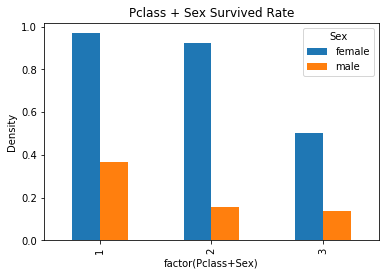

In [27]:
double_factor_explore('Pclass','Sex','Pclass + Sex Survived Rate','factor(Pclass+Sex)','Density')

- X轴代表不同舱位等级中两种性别，Y轴代表存活率
- 1级舱位中女性存活率96.81%，男性存活率36.89%，2级舱位中女性存活率92.11%，男性存活率为15.74%，3级舱位中女性存活率50.00%，男性存活率为13.54%

## 总结

- 本次分析建立在891条样本数据上的，年龄缺失的数据我们使用均值代替，因此此次分析是有误差的。
- 我们分析得出，舱位级别高，小孩和女性的乘客存活率比较高
- 在灾难发生乘客们逃生时，女性和小孩得到了优先照顾

## 交流研究成果

- 舱位级别越高，生还率越高，说明经济地位高的人会动用更多的资源找到更多的途径让自己逃生
- 小孩的存活率比中年和老年人高，可以推断在逃生过程中得到了优先照顾
- 在不同的舱位级别女性的存活率都比男性高，说明在逃生中女性作为弱势群体得到了男性们的照顾

<hr>

参考链接：

[https://blog.csdn.net/gufeibaixue/article/details/79658231](https://blog.csdn.net/gufeibaixue/article/details/79658231)

[https://my.oschina.net/nekyo/blog/1545133](https://my.oschina.net/nekyo/blog/1545133)